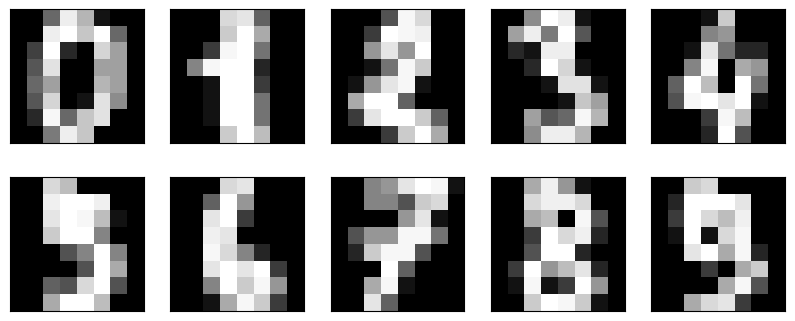

データの形状 (1797, 64)
ラベル [0 1 2 3 4 5 6 7 8 9]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

digits_data = datasets.load_digits()
n_img = 10
plt.figure(figsize=(10,4))
for i in range(n_img):
  ax = plt.subplot(2,5,i+1)
  plt.imshow(digits_data.data[i].reshape(8,8), cmap="Greys_r")
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()
print('データの形状', digits_data.data.shape)
print('ラベル', digits_data.target[:n_img])

In [3]:
digits_data

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import dataloader, TensorDataset

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
digit_images = digits_data.data
labels = digits_data.target

In [23]:
x_train, x_test, t_train, t_test = train_test_split(digit_images, labels)

In [24]:
x_train = torch.FloatTensor(x_train)
t_train = torch.LongTensor(t_train)
x_test = torch.FloatTensor(x_test)
t_test = torch.LongTensor(t_test)

nnモジュールのSequentialクラスを用いる

In [61]:
net = nn.Sequential(
    nn.Linear(64,32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16,10)
)
print(net)

Sequential(
  (0): Linear(in_features=64, out_features=32, bias=True)
  (1): ReLU()
  (2): Linear(in_features=32, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=10, bias=True)
)


In [62]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(params=net.parameters(), lr=0.01)

In [63]:
record_loss_train = []
record_loss_test = []

In [64]:
for epoch in range(1000):
  optimizer.zero_grad()
  y_train = net(x_train)
  y_test = net(x_test)
  loss_train = criterion(y_train, t_train)
  loss_test = criterion(y_test, t_test)
  record_loss_train.append(loss_train.data)
  record_loss_test.append(loss_test.data)
  loss_train.backward()
  optimizer.step()
  if epoch%100 == 0:
    print(epoch, loss_train.data, loss_test.data)

0 tensor(2.3700) tensor(2.3590)
100 tensor(1.4887) tensor(1.5293)
200 tensor(0.6433) tensor(0.6736)
300 tensor(0.3308) tensor(0.3563)
400 tensor(0.2185) tensor(0.2453)
500 tensor(0.1663) tensor(0.1971)
600 tensor(0.1352) tensor(0.1700)
700 tensor(0.1137) tensor(0.1526)
800 tensor(0.0976) tensor(0.1412)
900 tensor(0.0850) tensor(0.1331)


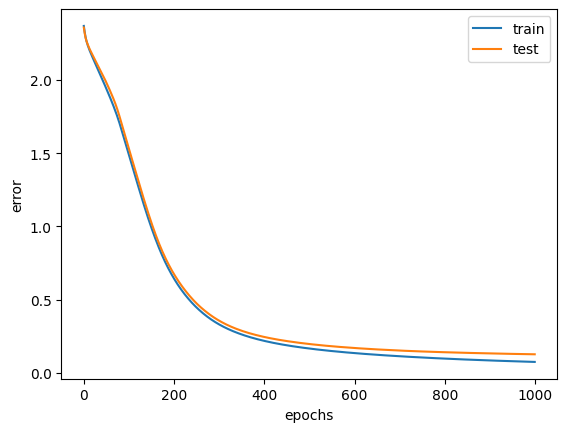

In [65]:
plt.plot(range(len(record_loss_train)), record_loss_train, label='train')
plt.plot(range(len(record_loss_test)), record_loss_test, label='test')
plt.legend()
plt.xlabel("epochs")
plt.ylabel("error")
plt.show()

In [77]:
y_test = net(x_test)
count = (y_test.argmax(1) == t_test).sum().item()
print('正解率:'+str(count/len(y_test)*100))

正解率:97.11111111111111


classを定義

In [93]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.fc6 = nn.Linear(64,32)
    self.fc7 = nn.Linear(32,16)
    self.fc8 = nn.Linear(16,10)
  def forward(self,x):
    x = F.relu(self.fc6(x))
    x = F.relu(self.fc7(x))
    x = self.fc8(x)
    return x

In [94]:
model = Net()

In [95]:
train = TensorDataset(x_train, t_train)
train_loader = dataloader.DataLoader(train, batch_size=15, shuffle=True)

In [96]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr=0.01)

In [97]:
record_train_score = []
record_test_score = []
for epoch in range(100):
  total_loss = 0
  for x_train_b ,t_train_b in train_loader:
    optimizer.zero_grad()
    output = model(x_train_b)
    loss = criterion(output, t_train_b)
    loss.backward()
    optimizer.step()
    total_loss += loss.data
  y_train = model(x_train)
  train_loss = criterion(y_train, t_train)
  y_test = model(x_test)
  test_loss = criterion(y_test, t_test)
  record_train_score.append(train_loss.item())
  record_test_score.append(test_loss.item())
  if epoch%10 == 0:
    print(epoch, total_loss)

0 tensor(153.6154)
10 tensor(9.4155)
20 tensor(3.6085)
30 tensor(1.8189)
40 tensor(1.0011)
50 tensor(0.6538)
60 tensor(0.4798)
70 tensor(0.3653)
80 tensor(0.2877)
90 tensor(0.2377)


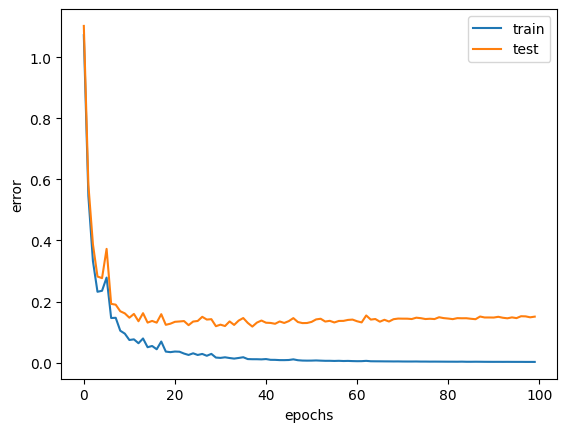

In [98]:
plt.plot(range(len(record_train_score)), record_train_score, label='train')
plt.plot(range(len(record_test_score)), record_test_score, label='test')
plt.legend()
plt.xlabel("epochs")
plt.ylabel("error")
plt.show()

In [99]:
y_test = model(x_test)
count = (y_test.argmax(1) == t_test).sum().item()
print('正解率:'+str(count/len(y_test)*100))

正解率:96.0
